In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE

In [2]:
data = pd.read_csv('/content/drive/MyDrive/SN_c')

In this stage, we can plot Hubble diagram:

Text(0, 0.5, 'velocity(km/s)')

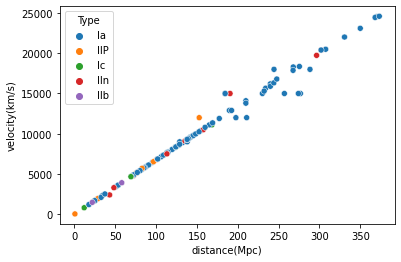

In [5]:
sns.scatterplot(data = data, x = data['distance'],y = data['velocity'] , hue = 'Type')
plt.xlabel('distance(Mpc)')
plt.ylabel('velocity(km/s)')

In [21]:
dis = np.array(data['distance']).reshape(-1,1)
vel = np.array(data['velocity']).reshape(-1,1)

In [22]:
reg = LR().fit(dis, vel)
print (reg.coef_)

[[65.3438991]]


In [25]:
vel_p = reg.predict(dis)

In [28]:
RMSE = MSE(vel, vel_p, squared=False)
print (RMSE)

741.9596509262823


According to Planck satellite, the hubble constant is about 67.3 with standard deviation of 1.2 (our prior knowledge). In the following I am going to modify this measurement:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  """
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [H]


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 19 seconds.


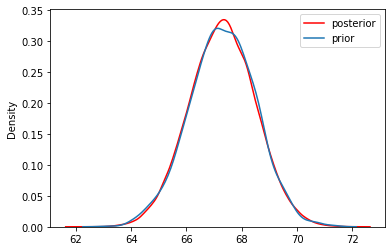

In [36]:
import pymc3 as pm
with pm.Model():
    H = pm.Normal('H',mu = 67.3,sigma = 1.2) # m = prior
    obs = pm.Normal('obs',mu = H,sigma=741,observed=65.3438)
    trace = pm.sample(20000)
    trace2 =  pm.sample_prior_predictive(samples=2000)
sns.kdeplot(trace['H'] , color = 'r')
sns.kdeplot(trace2['H'])
plt.legend(['posterior','prior'])
plt.show()

In [32]:
import arviz as az

tracee = trace['H']
a = az.hdi(tracee,hdi_prob=0.95)
aa = [float("{:.2f}".format(a[0])),float("{:.2f}".format(a[1]))]
b = [np.mean(tracee),np.median(tracee)]
print ('95% HD interval: ',aa)
print ('posterior_mean: ',round(b[0],2), '| posterior_median: ',round(b[1],2))

95% HD interval:  [64.92, 69.63]
posterior_mean:  67.3 | posterior_median:  67.3


As you can see, H is in [64.92, 69.63] with a probability of 95%.

Our data here is limited. So researchers can extend data and use the similar pipeline with different prior knowledge